In [23]:
from torchvision import datasets, transforms, models
import torch.utils.data as data
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import torch
from tqdm.notebook import trange, tqdm
import numpy as np
import random


In [24]:
# Define any transformations you want (similar to how you use in CIFAR10)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 32x32 like CIFAR if necessary
    transforms.ToTensor(),        # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize based on your dataset
])



# Load your custom dataset using ImageFolder
trainset = datasets.ImageFolder(root=r'..\Dataset\Train', transform=transform)
trainloader = data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = datasets.ImageFolder(root=r'..\Dataset\Train', transform=transform)
testloader = data.DataLoader(testset, batch_size=64, shuffle=True, num_workers=2)

# Load pre-trained ResNet-18 model
resnet = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes in your dataset
num_classes = len(trainset.classes)  # Get the number of classes
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)


In [28]:
# Load pre-trained ResNet-18 model
resnet = models.resnet18(pretrained=True)

# Freeze all layers
for param in resnet.parameters():
    param.requires_grad = False

# Modify the fully connected layer for the correct number of classes
num_classes = len(trainset.classes)  # Get the number of classes in your dataset
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# # Enable training for the fully connected layer
# for param in resnet.fc.parameters():
#     param.requires_grad = True

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet = resnet.to(device)

# Define the loss function and optimizer
resnet.eval()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)



In [29]:
# Assuming you have a DataLoader for your dataset
# trainloader: DataLoader for your training set
# testloader: DataLoader for your test/validation set
num_epochs = 10  # Number of epochs to train the model

# Training loop
for epoch in range(num_epochs):
    resnet.train()  # Set the model to training mode
    running_loss = 0.0
    progress_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    
    # Optional: Evaluate on the validation set after each epoch
    resnet.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy after epoch {epoch + 1}: {100 * correct / total:.2f}%")

print('Finished Training')

Epoch 1/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 1, Batch 100] loss: 1.303
[Epoch 1, Batch 200] loss: 0.612
Accuracy after epoch 1: 89.22%


Epoch 2/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 2, Batch 100] loss: 0.417
[Epoch 2, Batch 200] loss: 0.355
Accuracy after epoch 2: 92.50%


Epoch 3/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 3, Batch 100] loss: 0.302
[Epoch 3, Batch 200] loss: 0.280
Accuracy after epoch 3: 93.62%


Epoch 4/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 4, Batch 100] loss: 0.252
[Epoch 4, Batch 200] loss: 0.234
Accuracy after epoch 4: 94.80%


Epoch 5/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 5, Batch 100] loss: 0.213
[Epoch 5, Batch 200] loss: 0.213
Accuracy after epoch 5: 95.45%


Epoch 6/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 6, Batch 100] loss: 0.196
[Epoch 6, Batch 200] loss: 0.190
Accuracy after epoch 6: 95.30%


Epoch 7/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 7, Batch 100] loss: 0.179
[Epoch 7, Batch 200] loss: 0.179
Accuracy after epoch 7: 95.60%


Epoch 8/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 8, Batch 100] loss: 0.171
[Epoch 8, Batch 200] loss: 0.166
Accuracy after epoch 8: 95.73%


Epoch 9/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 9, Batch 100] loss: 0.159
[Epoch 9, Batch 200] loss: 0.156
Accuracy after epoch 9: 95.65%


Epoch 10/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 10, Batch 100] loss: 0.146
[Epoch 10, Batch 200] loss: 0.159
Accuracy after epoch 10: 96.53%
Finished Training


Train+plot

Epoch 1/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 1, Batch 100] loss: 0.142
[Epoch 1, Batch 200] loss: 0.138
Accuracy after epoch 1: 96.55%


Epoch 2/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 2, Batch 100] loss: 0.118
[Epoch 2, Batch 200] loss: 0.122
Accuracy after epoch 2: 96.81%


Epoch 3/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 3, Batch 100] loss: 0.119
[Epoch 3, Batch 200] loss: 0.113
Accuracy after epoch 3: 96.86%


Epoch 4/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 4, Batch 100] loss: 0.106
[Epoch 4, Batch 200] loss: 0.111
Accuracy after epoch 4: 97.20%


Epoch 5/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 5, Batch 100] loss: 0.105
[Epoch 5, Batch 200] loss: 0.100
Accuracy after epoch 5: 97.02%


Epoch 6/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 6, Batch 100] loss: 0.098
[Epoch 6, Batch 200] loss: 0.105
Accuracy after epoch 6: 97.34%


Epoch 7/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 7, Batch 100] loss: 0.095
[Epoch 7, Batch 200] loss: 0.095
Accuracy after epoch 7: 96.96%


Epoch 8/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 8, Batch 100] loss: 0.100
[Epoch 8, Batch 200] loss: 0.090
Accuracy after epoch 8: 97.33%


Epoch 9/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 9, Batch 100] loss: 0.089
[Epoch 9, Batch 200] loss: 0.100
Accuracy after epoch 9: 97.41%


Epoch 10/10:   0%|          | 0/236 [00:00<?, ?batch/s]

[Epoch 10, Batch 100] loss: 0.088
[Epoch 10, Batch 200] loss: 0.090
Accuracy after epoch 10: 97.65%
Finished Training


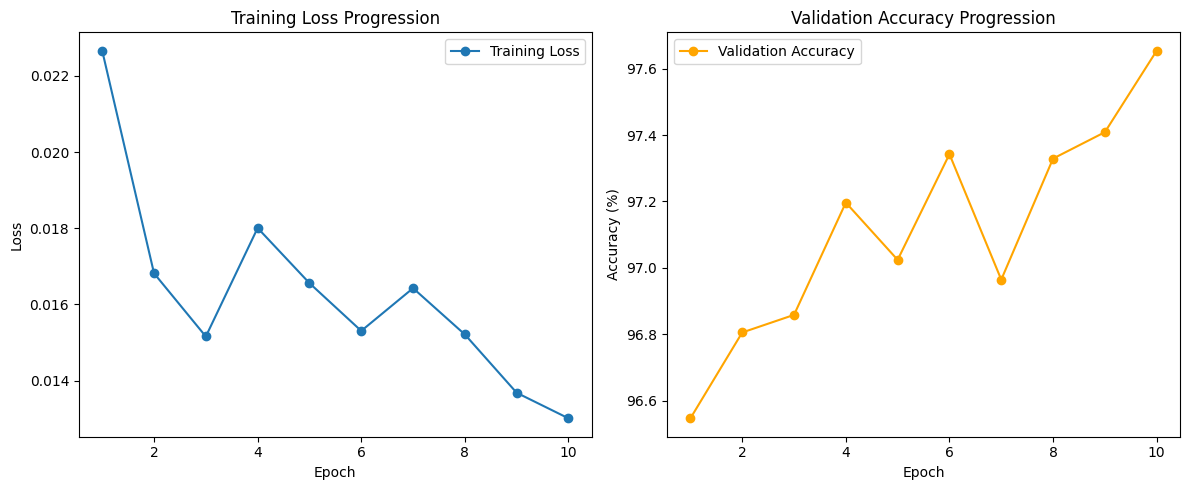

In [30]:
# Define the number of epochs
num_epochs = 10

# Lists to store loss and accuracy
train_losses = []
val_accuracies = []
resnet.train()  # Set the model to training mode
# Training loop
for epoch in range(num_epochs):

    running_loss = 0.0
    progress_bar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")
    
    # Mini-batch training
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate the running loss
        running_loss += loss.item()
        
        # Print loss every 100 mini-batches
        if i % 100 == 99:  
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    
    # After each epoch, save the average training loss
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    # Validation accuracy check
    resnet.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate and store validation accuracy
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f"Accuracy after epoch {epoch + 1}: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training loss and validation accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.title('Training Loss Progression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='orange')
plt.title('Validation Accuracy Progression')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Load GoogleNet (Inception v3) pre-trained model
googlenet = models.googlenet(pretrained=True)

# Freeze all layers except for the final classification layer
for param in googlenet.parameters():
    param.requires_grad = False

# Modify the fully connected (fc) layer to fit the number of classes in your dataset
num_classes = len(trainset.classes)  # Replace with the correct number of classes
googlenet.fc = nn.Linear(googlenet.fc.in_features, num_classes)

# Enable training only for the modified fully connected layer
for param in googlenet.fc.parameters():
    param.requires_grad = True

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
googlenet = googlenet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(googlenet.fc.parameters(), lr=0.001)

# Set up DataLoaders (trainloader and testloader)
# Assuming you already have the trainset and testset defined

[Epoch 1, Batch 100] loss: 0.194
[Epoch 1, Batch 200] loss: 0.184
Accuracy after epoch 1: 95.97%
[Epoch 2, Batch 100] loss: 0.188
[Epoch 2, Batch 200] loss: 0.189
Accuracy after epoch 2: 96.08%
[Epoch 3, Batch 100] loss: 0.182
[Epoch 3, Batch 200] loss: 0.187
Accuracy after epoch 3: 96.14%
[Epoch 4, Batch 100] loss: 0.185
[Epoch 4, Batch 200] loss: 0.184
Accuracy after epoch 4: 96.09%
[Epoch 5, Batch 100] loss: 0.182
[Epoch 5, Batch 200] loss: 0.182
Accuracy after epoch 5: 96.34%
[Epoch 6, Batch 100] loss: 0.177
[Epoch 6, Batch 200] loss: 0.181
Accuracy after epoch 6: 96.58%
[Epoch 7, Batch 100] loss: 0.177
[Epoch 7, Batch 200] loss: 0.175
Accuracy after epoch 7: 96.16%
[Epoch 8, Batch 100] loss: 0.171
[Epoch 8, Batch 200] loss: 0.179
Accuracy after epoch 8: 95.98%
[Epoch 9, Batch 100] loss: 0.173
[Epoch 9, Batch 200] loss: 0.160
Accuracy after epoch 9: 96.32%
[Epoch 10, Batch 100] loss: 0.169
[Epoch 10, Batch 200] loss: 0.168
Accuracy after epoch 10: 96.76%
Finished Training


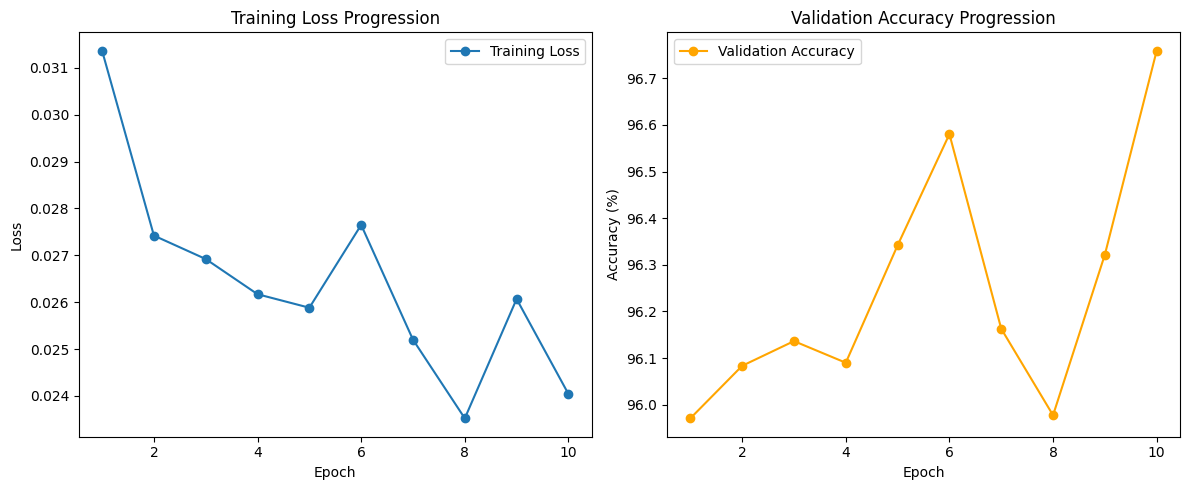

In [33]:
num_epochs = 10  # Adjust number of epochs as needed
train_losses = []
val_accuracies = []
for epoch in range(num_epochs):
    googlenet.train()  # Set the model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = googlenet(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
            # After each epoch, save the average training loss
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)
    
    # Validation loop (optional)
    googlenet.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = googlenet(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f"Accuracy after epoch {epoch + 1}: {100 * correct / total:.2f}%")

print('Finished Training')

# Plot training loss and validation accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.title('Training Loss Progression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='orange')
plt.title('Validation Accuracy Progression')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
import torch.nn.functional as F
import torch.nn as nn
class CustomParallelCNN(nn.Module):
    def __init__(self):
        super(CustomParallelCNN, self).__init__()

        # First parallel branch (Conv layers with 3x3 kernels)
        self.conv1_branch1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2_branch1 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3_branch1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.batch_norm_branch1 = nn.BatchNorm2d(128)
        self.pool_branch1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second parallel branch (Conv layers with 5x5 kernels)
        self.conv1_branch2 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        self.conv2_branch2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.conv3_branch2 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.batch_norm_branch2 = nn.BatchNorm2d(128)
        self.pool_branch2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers after merging the parallel branches
        # Adjust the linear layer's input based on the final output size
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 14 * 14 * 2, 256),  # 128 filters, 14x14 after pooling, times 2 branches
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 12)  # Output layer for 12 classes
        )

    def forward(self, x):
        # First branch forward pass
        out1 = F.relu(self.conv1_branch1(x))
        out1 = self.pool_branch1(F.relu(self.conv2_branch1(out1)))
        out1 = self.pool_branch1(F.relu(self.conv3_branch1(out1)))
        out1 = self.batch_norm_branch1(out1)

        # Second branch forward pass
        out2 = F.relu(self.conv1_branch2(x))
        out2 = self.pool_branch2(F.relu(self.conv2_branch2(out2)))
        out2 = self.pool_branch2(F.relu(self.conv3_branch2(out2)))
        out2 = self.batch_norm_branch2(out2)

        # Flatten and concatenate outputs from both branches
        out1 = out1.view(out1.size(0), -1)
        out2 = out2.view(out2.size(0), -1)
        merged_out = torch.cat((out1, out2), dim=1)

        # Pass through fully connected layers
        out = self.fc_layers(merged_out)
        return out

In [43]:
model = CustomParallelCNN()

# Print model summary (optional)
print(model)

CustomParallelCNN(
  (conv1_branch1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_branch1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_branch1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm_branch1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool_branch1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1_branch2): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_branch2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3_branch2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch_norm_branch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool_branch2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_layers): Sequential(
    (0): Linear(in_features=50176, out_features=

In [44]:

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(googlenet.fc.parameters(), lr=0.001)

# Set up DataLoaders (trainloader and testloader)
# Assuming you already have the trainset and testset defined

In [45]:
num_epochs = 10  # Adjust number of epochs as needed
train_losses = []
val_accuracies = []
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
            # After each epoch, save the average training loss
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)
    
    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f"Accuracy after epoch {epoch + 1}: {100 * correct / total:.2f}%")

print('Finished Training')

# Plot training loss and validation accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.title('Training Loss Progression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='orange')
plt.title('Validation Accuracy Progression')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 2.70 GiB is allocated by PyTorch, and 536.43 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [46]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming model is your CustomParallelCNN model, and it's already defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomParallelCNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Assuming we're using cross-entropy for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust the learning rate as needed

# Assuming you have defined trainloader and testloader for training and validation data
# num_epochs, train_losses, and val_accuracies are already given in the template
num_epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    
    # After each epoch, save the average training loss
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)
    
    # Validation loop (optional)
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print(f"Accuracy after epoch {epoch + 1}: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training loss and validation accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.title('Training Loss Progression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='orange')
plt.title('Validation Accuracy Progression')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 2.78 GiB is allocated by PyTorch, and 451.32 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)